<a href="https://colab.research.google.com/github/ptkoo/machineLearningJourney/blob/main/Gradient_Boost_Machine_Regression_PaingThetKo(65011416)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define data for each row as a list of lists
data = [
    [ 1.6, 'Blue', 'Male', 88 ],
    [ 1.6, 'Green', 'Female', 76 ],
    [ 1.5, 'Blue', 'Female', 56 ],
    [ 1.8, 'Red', 'Male', 73 ],
    [ 1.5, 'Green', 'Male', 77 ],
    [ 1.4, 'Blue', 'Male', 57 ],
]

# Define the column names
columns = ['height', 'favorite_color', 'gender', 'weight']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

## Section 1 : Simple run through

In [ ]:
df

,height,favorite_color,gender,weight
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Male,57


In [ ]:
initial_guess = df['weight'].mean()
initial_guess



71.16666666666667

In [ ]:
def compute_residual_front_inital_guess(row,initial_guess):
  # calculate the residual here and return the row
  weight = row['weight']
  residual = weight - initial_guess
  row['initial_guess'] = initial_guess
  row['residual'] = residual

  return row

df= df.apply(compute_residual_front_inital_guess, axis=1, initial_guess=initial_guess)

In [ ]:
df

,height,favorite_color,gender,weight,initial_guess,residual
0,1.6,Blue,Male,88,71.166667,16.833333
1,1.6,Green,Female,76,71.166667,4.833333
2,1.5,Blue,Female,56,71.166667,-15.166667
3,1.8,Red,Male,73,71.166667,1.833333
4,1.5,Green,Male,77,71.166667,5.833333
5,1.4,Blue,Male,57,71.166667,-14.166667


In [ ]:
model = DecisionTreeRegressor(max_leaf_nodes=4)



In [ ]:
df_encoded = pd.get_dummies(df, columns=['favorite_color', 'gender',])
df_encoded

,height,weight,initial_guess,residual,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
0,1.6,88,71.166667,16.833333,True,False,False,False,True
1,1.6,76,71.166667,4.833333,False,True,False,True,False
2,1.5,56,71.166667,-15.166667,True,False,False,True,False
3,1.8,73,71.166667,1.833333,False,False,True,False,True
4,1.5,77,71.166667,5.833333,False,True,False,False,True
5,1.4,57,71.166667,-14.166667,True,False,False,False,True


In [ ]:
X_train = df_encoded.drop(['weight', 'residual','initial_guess'], axis=1)
y_train = df[['residual']]

In [ ]:
X_train

,height,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
0,1.6,True,False,False,False,True
1,1.6,False,True,False,True,False
2,1.5,True,False,False,True,False
3,1.8,False,False,True,False,True
4,1.5,False,True,False,False,True
5,1.4,True,False,False,False,True


In [ ]:
model.fit( X_train , y_train)

DecisionTreeRegressor(max_leaf_nodes=4)

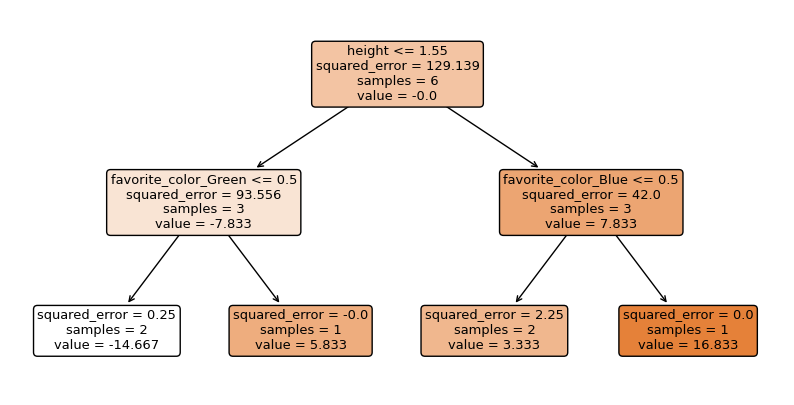

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(10,5))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

In [ ]:
df['tree_1'] = model.predict(X_train)*0.1

In [ ]:
df

,height,favorite_color,gender,weight,initial_guess,residual,tree_1
0,1.6,Blue,Male,88,71.166667,16.833333,1.683333
1,1.6,Green,Female,76,71.166667,4.833333,0.333333
2,1.5,Blue,Female,56,71.166667,-15.166667,-1.466667
3,1.8,Red,Male,73,71.166667,1.833333,0.333333
4,1.5,Green,Male,77,71.166667,5.833333,0.583333
5,1.4,Blue,Male,57,71.166667,-14.166667,-1.466667


In [ ]:
df['current_prediction'] =  df['tree_1'] +  df['initial_guess']

In [ ]:
df

,height,favorite_color,gender,weight,initial_guess,residual,tree_1,current_prediction
0,1.6,Blue,Male,88,71.166667,16.833333,1.683333,72.85
1,1.6,Green,Female,76,71.166667,4.833333,0.333333,71.50
2,1.5,Blue,Female,56,71.166667,-15.166667,-1.466667,69.70
3,1.8,Red,Male,73,71.166667,1.833333,0.333333,71.50
4,1.5,Green,Male,77,71.166667,5.833333,0.583333,71.75
5,1.4,Blue,Male,57,71.166667,-14.166667,-1.466667,69.70


In [ ]:
df['residual'] =  df['weight'] - df['current_prediction']

In [ ]:
df

,height,favorite_color,gender,weight,initial_guess,residual,tree_1,current_prediction
0,1.6,Blue,Male,88,71.166667,15.15,1.683333,72.85
1,1.6,Green,Female,76,71.166667,4.50,0.333333,71.50
2,1.5,Blue,Female,56,71.166667,-13.70,-1.466667,69.70
3,1.8,Red,Male,73,71.166667,1.50,0.333333,71.50
4,1.5,Green,Male,77,71.166667,5.25,0.583333,71.75
5,1.4,Blue,Male,57,71.166667,-12.70,-1.466667,69.70


In [ ]:
X_train

,height,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
0,1.6,True,False,False,False,True
1,1.6,False,True,False,True,False
2,1.5,True,False,False,True,False
3,1.8,False,False,True,False,True
4,1.5,False,True,False,False,True
5,1.4,True,False,False,False,True


In [ ]:
y_train = df[['residual']]
y_train

,residual
0,15.15
1,4.50
2,-13.70
3,1.50
4,5.25
5,-12.70


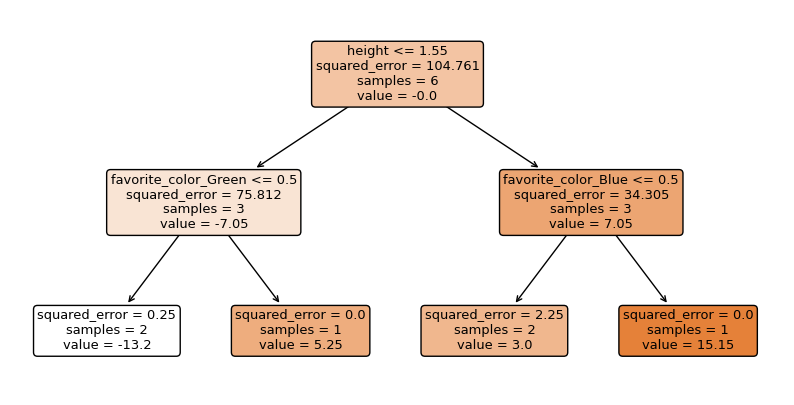

In [ ]:
model.fit( X_train , y_train)
# Visualize the decision tree
plt.figure(figsize=(10,5))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

In [ ]:
df['tree_2'] = model.predict(X_train)*0.1

In [ ]:
df

,height,favorite_color,gender,weight,initial_guess,residual,tree_1,current_prediction,tree_2
0,1.6,Blue,Male,88,71.166667,15.15,1.683333,72.85,1.515
1,1.6,Green,Female,76,71.166667,4.50,0.333333,71.50,0.300
2,1.5,Blue,Female,56,71.166667,-13.70,-1.466667,69.70,-1.320
3,1.8,Red,Male,73,71.166667,1.50,0.333333,71.50,0.300
4,1.5,Green,Male,77,71.166667,5.25,0.583333,71.75,0.525
5,1.4,Blue,Male,57,71.166667,-12.70,-1.466667,69.70,-1.320


In [ ]:
df['current_prediction'] =  df['tree_1'] +  df['initial_guess'] + df['tree_2']

In [ ]:
df

,height,favorite_color,gender,weight,initial_guess,residual,tree_1,current_prediction,tree_2
0,1.6,Blue,Male,88,71.166667,15.15,1.683333,74.365,1.515
1,1.6,Green,Female,76,71.166667,4.50,0.333333,71.800,0.300
2,1.5,Blue,Female,56,71.166667,-13.70,-1.466667,68.380,-1.320
3,1.8,Red,Male,73,71.166667,1.50,0.333333,71.800,0.300
4,1.5,Green,Male,77,71.166667,5.25,0.583333,72.275,0.525
5,1.4,Blue,Male,57,71.166667,-12.70,-1.466667,68.380,-1.320


In [ ]:
def cal_stump3_and_update_prediction(df):
  # here you will build a new tree and calculate the updated 'current_prediction'
  # update values for columns 'residual', 'current_prediction' and 'tree_3' columns in the df
  # update residual
  df['residual'] =  df['weight'] - df['current_prediction']
  # build tree to predict residual
  y_train = df[['residual']]
  model.fit( X_train , y_train)
  # multiply with learning rate
  df['tree_3'] = model.predict(X_train)*0.1
  # update current prediction
  df['current_prediction'] =  df['tree_1'] +  df['initial_guess'] + df['tree_2'] + df['tree_3']
  # update residual again
  df['residual'] =  df['weight'] - df['current_prediction']

  return df

df = cal_stump3_and_update_prediction(df)

In [ ]:
df

,height,favorite_color,gender,weight,initial_guess,residual,tree_1,current_prediction,tree_2,tree_3
0,1.6,Blue,Male,88,71.166667,12.2715,1.683333,75.7285,1.515,1.3635
1,1.6,Green,Female,76,71.166667,3.9300,0.333333,72.0700,0.300,0.2700
2,1.5,Blue,Female,56,71.166667,-11.1920,-1.466667,67.1920,-1.320,-1.1880
3,1.8,Red,Male,73,71.166667,0.9300,0.333333,72.0700,0.300,0.2700
4,1.5,Green,Male,77,71.166667,4.2525,0.583333,72.7475,0.525,0.4725
5,1.4,Blue,Male,57,71.166667,-10.1920,-1.466667,67.1920,-1.320,-1.1880


In [ ]:
assert np.allclose( df['tree_3'].to_numpy() , np.array([ 1.3635,  0.27  , -1.188 ,  0.27  ,  0.4725, -1.188 ]) )

In [ ]:
assert np.allclose( df['current_prediction'].to_numpy(), np.array([75.7285, 72.07  , 67.192 , 72.07  , 72.7475, 67.192 ]) )

In [ ]:
assert np.allclose( df['residual'].to_numpy(), np.array([ 12.2715,   3.93  , -11.192 ,   0.93  ,   4.2525, -10.192 ]) )

## Section 2: Build Gradient Boost Machine

In [ ]:
# Define data for each row as a list of lists
data = [
    [ 1.6, 'Blue', 'Male', 88 ],
    [ 1.6, 'Green', 'Female', 76 ],
    [ 1.5, 'Blue', 'Female', 56 ],
    [ 1.8, 'Red', 'Male', 73 ],
    [ 1.5, 'Green', 'Male', 77 ],
    [ 1.4, 'Blue', 'Male', 57 ],
]

# Define the column names
columns = ['height', 'favorite_color', 'gender', 'weight']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

In [ ]:
df

,height,favorite_color,gender,weight
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Male,57


In [ ]:
df_encoded = pd.get_dummies(df, columns=['favorite_color', 'gender'])

In [ ]:
df_encoded

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
0,1.6,88,True,False,False,False,True
1,1.6,76,False,True,False,True,False
2,1.5,56,True,False,False,True,False
3,1.8,73,False,False,True,False,True
4,1.5,77,False,True,False,False,True
5,1.4,57,True,False,False,False,True


In [ ]:
df_train = df_encoded.copy()

In [ ]:
df_train

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
0,1.6,88,True,False,False,False,True
1,1.6,76,False,True,False,True,False
2,1.5,56,True,False,False,True,False
3,1.8,73,False,False,True,False,True
4,1.5,77,False,True,False,False,True
5,1.4,57,True,False,False,False,True


In [ ]:
def initialize_prediction(df, target):
  # calculate the initial prediction value and reutrn a df with columns 'current_prediction' and 'residual'
  initial_prediction = df[target].mean() # First initial value is the mean of the observed weight
  df['current_prediction'] = initial_prediction
  df['residual'] = df[target] - initial_prediction

  return df, initial_prediction


In [ ]:
df_train, initial_prediction = initialize_prediction(df_train, 'weight')

In [ ]:
df_train

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male,current_prediction,residual
0,1.6,88,True,False,False,False,True,71.166667,16.833333
1,1.6,76,False,True,False,True,False,71.166667,4.833333
2,1.5,56,True,False,False,True,False,71.166667,-15.166667
3,1.8,73,False,False,True,False,True,71.166667,1.833333
4,1.5,77,False,True,False,False,True,71.166667,5.833333
5,1.4,57,True,False,False,False,True,71.166667,-14.166667


In [ ]:
assert np.allclose( initial_prediction, 71.16666666666667)

In [ ]:
def next_tree_prediction(df, target, max_leaf_nodes, learning_rate ):
  # Train the next decsion tree. Update the 'current_prediction' and the 'residual'.
  # Prediction of residuals from the features X
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
  X = df.drop([target, 'current_prediction', 'residual'], axis=1)
  y = df['residual']
  model.fit(X,y)

  # Update current prediction and residuals
  df['current_prediction'] += learning_rate * model.predict(X)
  df['residual'] = df[target] - df['current_prediction']

  return df, model

In [ ]:
df_train, tree = next_tree_prediction( df_train, 'weight', 4, 0.1 )

In [ ]:
df_train

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male,current_prediction,residual
0,1.6,88,True,False,False,False,True,72.85,15.15
1,1.6,76,False,True,False,True,False,71.50,4.50
2,1.5,56,True,False,False,True,False,69.70,-13.70
3,1.8,73,False,False,True,False,True,71.50,1.50
4,1.5,77,False,True,False,False,True,71.75,5.25
5,1.4,57,True,False,False,False,True,69.70,-12.70


In [ ]:
assert np.allclose( df_train['residual'].to_numpy(), np.array([ 15.15,   4.5 , -13.7 ,   1.5 ,   5.25, -12.7 ]) )

In [ ]:
assert np.allclose(  tree.predict(df_train.drop( [ 'weight', 'current_prediction', 'residual'], axis=1) ), np.array([ 16.83333333,   3.33333333, -14.66666667,   3.33333333, 5.83333333, -14.66666667]) )

In [ ]:
def run_gradient_boost_regression(df, target, string_categorical_columns, max_leaf_nodes, learning_rate, iterations ):
  # put it all together to ryn the full gbm algorithm here and build many trees
  # return the initial predicition and the lis of trees
  # Get the feature to predict the weight
  df = pd.get_dummies(df, columns=string_categorical_columns)
  # Step 1 : Initialize Prediction and Loss function (average)

  df, initial_prediction = initialize_prediction(df, target)

  tree_list = []
  # Step 2: Build the tree and update the prediction
  for _ in range(iterations):
    df, tree = next_tree_prediction(df, target, max_leaf_nodes, learning_rate)
    tree_list.append(tree)
  return df, initial_prediction, tree_list

In [ ]:
df_train = df.copy()
df_train, initial_predictition, tree_list = run_gradient_boost_regression(df_train, 'weight', ['favorite_color', 'gender'] , 4 , 0.1, 10 )

In [ ]:
df_train

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male,current_prediction,residual
0,1.6,88,True,False,False,False,True,82.130580,5.869420
1,1.6,76,False,True,False,True,False,73.337739,2.662261
2,1.5,56,True,False,False,True,False,61.613950,-5.613950
3,1.8,73,False,False,True,False,True,73.337739,-0.337739
4,1.5,77,False,True,False,False,True,74.966042,2.033958
5,1.4,57,True,False,False,False,True,61.613950,-4.613950


In [ ]:
initial_prediction

71.16666666666667

In [ ]:
tree_list

[DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4),
 DecisionTreeRegressor(max_leaf_nodes=4)]

In [ ]:
def run_gradient_boost_regression_predicition_with_x_train(df, target, initial_prediction, tree_list, learning_rate ):
  # Noww use the decision tree stumps to run inference prediction using X_train as input

  prediction = np.full(X_train.shape[0], initial_prediction)

  for tree in tree_list:
    prediction += learning_rate * tree.predict(X_train)

  return prediction

In [ ]:
def run_gradient_boost_regression_predicition_with_x_test(df, target, initial_prediction, tree_list, learning_rate ):
  # Noww use the decision tree stumps to run inference prediction using X_test as input.

  prediction = np.full(X_test.shape[0], initial_prediction)

  for tree in tree_list:
    prediction += learning_rate * tree.predict(X_test)

  return prediction

In [ ]:
df_train

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male,current_prediction,residual
0,1.6,88,True,False,False,False,True,82.130580,5.869420
1,1.6,76,False,True,False,True,False,73.337739,2.662261
2,1.5,56,True,False,False,True,False,61.613950,-5.613950
3,1.8,73,False,False,True,False,True,73.337739,-0.337739
4,1.5,77,False,True,False,False,True,74.966042,2.033958
5,1.4,57,True,False,False,False,True,61.613950,-4.613950


In [ ]:
X_test = df_train.drop(['weight','current_prediction', 'residual'], axis=1)

In [ ]:
print(X_train)

   height  favorite_color_Blue  favorite_color_Green  favorite_color_Red  \
0     1.6                 True                 False               False   
1     1.6                False                  True               False   
2     1.5                 True                 False               False   
3     1.8                False                 False                True   
4     1.5                False                  True               False   
5     1.4                 True                 False               False   

   gender_Female  gender_Male  
0          False         True  
1           True        False  
2           True        False  
3          False         True  
4          False         True  
5          False         True  


In [ ]:
run_gradient_boost_regression_predicition_with_x_train(df_train , 'weight', initial_prediction, tree_list, 0.1)

array([82.13057959, 73.33773853, 61.61395045, 73.33773853, 74.96604243,
       61.61395045])

In [ ]:
assert np.allclose( run_gradient_boost_regression_predicition_with_x_train(df_train, 'weight', initial_prediction, tree_list, 0.1) , np.array([82.13057959, 73.33773853, 61.61395045, 73.33773853, 74.96604243, 61.61395045]) )

In [ ]:
assert np.allclose( run_gradient_boost_regression_predicition_with_x_test(df_train.drop(['current_prediction', 'residual'], axis=1), 'weight', initial_prediction, tree_list, 0.1) , np.array([82.13057959, 73.33773853, 61.61395045, 73.33773853, 74.96604243, 61.61395045]) )

## Section 3 - Gradient Boost Machine Regression with Real Dataset

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

df_train, df_test = train_test_split( df_encoded, test_size=0.3, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

def plot_result(x, y1, y2, y1_label, y2_label):
  # Plotting the lines
  plt.plot(x, y1, label=y1_label, color='blue')  # First line
  plt.plot(x, y2, label=y2_label, color='red')   # Second line

  # Adding title
  plt.title('Line Plot with Two Lines')

  # Adding labels
  plt.xlabel('x axis')
  plt.ylabel('y axis')

  # Showing legend
  plt.legend()

  # Display the plot
  plt.show()

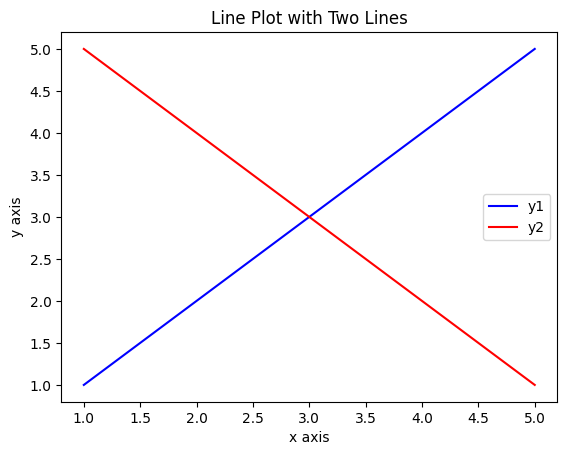

In [ ]:
plot_result( [1, 2, 3, 4, 5] , [1, 2, 3, 4, 5] , [5, 4, 3, 2, 1] , 'y1', 'y2')

In [ ]:
def run_gradient_boost_regression_train_test(df_train, df_test, target, max_leaf_nodes, learning_rate, iterations ):
  # Put it all together to run the train and test dataset togehter
  # produce the plot shown below for the train and test mse
  train_mse = []
  test_mse = []
  # Step 1: Initial prediction ( Average )
  df_train, initial_predictions = initialize_prediction(df_train, target)

  # List to store trained trees
  tree_list = []

  # Train multiple trees
  for _ in range(iterations):
    df_train, tree = next_tree_prediction(df_train, target, max_leaf_nodes, learning_rate)
    tree_list.append(tree)

    train_prediction = initial_predictions
    for tree in tree_list:
      train_prediction += learning_rate * tree.predict(df_train.drop(columns=[target, 'current_prediction', 'residual']))
    train_mse.append(np.mean((train_prediction - df_train[target])**2))

    # Calculate test MSE after each iteration
    test_prediction = initial_predictions
    for tree in tree_list:
      test_prediction += learning_rate * tree.predict(df_test.drop(columns=[target]))
    test_mse.append(np.mean((test_prediction - df_test[target])**2))


  x = range(1, iterations + 1)

  plot_result(x,train_mse,test_mse,'Train_MSE','Test_MSE')

  return df_train, initial_predictions, tree_list

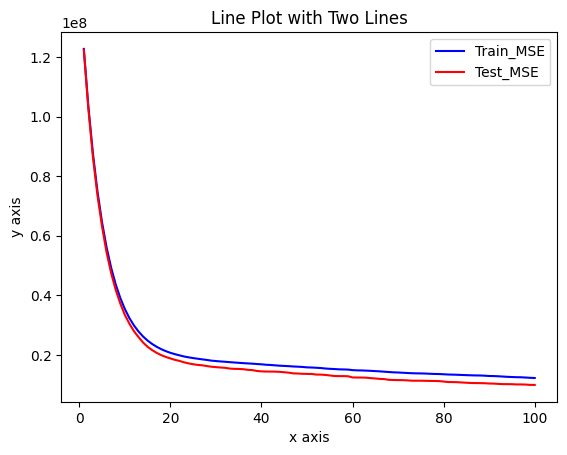

In [ ]:
df_train, initial_predictition, tree_list = run_gradient_boost_regression_train_test(df_encoded, df_test, 'charges' , 8 , 0.1, 100 )

In [ ]:
X_train = df_train.drop(['charges','residual','current_prediction'],axis = 1)
X_test = df_test.drop(['charges'],axis = 1)

In [ ]:
predictions = run_gradient_boost_regression_predicition_with_x_train(df_train, 'charges', initial_prediction, tree_list, 0.1)

In [ ]:
print(df_train['charges'].to_numpy().shape)

(1338,)


In [ ]:
train_mse = ( (df_train['charges'].to_numpy() - predictions)**2 ).mean()
train_mse

186509082.7561339

In [ ]:
assert train_mse < 2e8

In [ ]:
predictions = run_gradient_boost_regression_predicition_with_x_test(df_test, 'charges', initial_prediction, tree_list, 0.1)

In [ ]:
print(df_test['charges'].to_numpy().shape)
print(predictions.shape)

(402,)
(402,)


In [ ]:
test_mse = ( (df_test['charges'].to_numpy() - predictions)**2 ).mean()
test_mse

180104935.82095984

In [ ]:
assert test_mse < 2e8